# Pandas.pydata.org practice material

In [3]:
import pandas as pd

dates = pd.date_range("20130101", periods=6)

dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
import numpy as np
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.732843,-1.080405,-0.202825,1.175246
2013-01-02,1.905190,0.543353,-0.111374,0.323348
2013-01-03,0.237206,-1.562862,1.088439,-0.982023
2013-01-04,1.333752,0.756997,0.383574,1.811350
2013-01-05,0.537222,-0.266467,1.553910,0.659744
2013-01-06,0.615826,1.095335,-0.634447,-0.197770


In [8]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

In [9]:
df.to_numpy()

array([[ 0.73284343, -1.08040519, -0.20282487,  1.17524607],
       [ 1.90518967,  0.54335256, -0.11137449,  0.32334791],
       [ 0.23720578, -1.56286184,  1.08843878, -0.982023  ],
       [ 1.33375189,  0.7569971 ,  0.38357402,  1.81134978],
       [ 0.53722233, -0.26646731,  1.55390953,  0.65974354],
       [ 0.61582602,  1.09533532, -0.63444702, -0.19777049]])

In [10]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [17]:
df1 = df[df > 0]
df1

,A,B,C,D
2013-01-01,0.732843,NaN,NaN,1.175246
2013-01-02,1.905190,0.543353,NaN,0.323348
2013-01-03,0.237206,NaN,1.088439,NaN
2013-01-04,1.333752,0.756997,0.383574,1.811350
2013-01-05,0.537222,NaN,1.553910,0.659744
2013-01-06,0.615826,1.095335,NaN,NaN


In [14]:
df[df["D"] > 0] # selecting data as per condition is given

,A,B,C,D
2013-01-01,0.732843,-1.080405,-0.202825,1.175246
2013-01-02,1.905190,0.543353,-0.111374,0.323348
2013-01-04,1.333752,0.756997,0.383574,1.811350
2013-01-05,0.537222,-0.266467,1.553910,0.659744


In [18]:
# df.dropna(how="any") to delete all rows having "nan" value
df1.fillna(value=5) # to replace "nan" values with any number

,A,B,C,D
2013-01-01,0.732843,5.000000,5.000000,1.175246
2013-01-02,1.905190,0.543353,5.000000,0.323348
2013-01-03,0.237206,5.000000,1.088439,5.000000
2013-01-04,1.333752,0.756997,0.383574,1.811350
2013-01-05,0.537222,5.000000,1.553910,0.659744
2013-01-06,0.615826,1.095335,5.000000,5.000000


In [19]:
pd.isna(df1)    # gets the boolean mask where values are "nan"

,A,B,C,D
2013-01-01,False,True,True,False
2013-01-02,False,False,True,False
2013-01-03,False,True,False,True
2013-01-04,False,False,False,False
2013-01-05,False,True,False,False
2013-01-06,False,False,True,True


In [21]:
df3 = pd.DataFrame(np.random.randn(10, 4))
df3

,0,1,2,3
0,-0.356858,-1.819232,1.334131,0.215866
1,1.201561,1.817574,-0.511396,-1.117877
2,1.029375,0.604572,0.955839,2.182580
3,-0.812096,-1.477342,1.116213,-0.304374
4,0.086431,0.690406,-1.127221,-0.588999
5,-0.077815,-1.324877,-1.268127,-0.456003
6,-0.913442,0.849555,1.336670,-1.161263
7,-0.184870,-0.849486,0.605862,0.588222
8,-1.793429,-0.621948,-0.771271,-1.575594
9,1.093051,-0.170366,-1.701267,1.253417


In [23]:
pieces = [df3[:3], df3[3:7], df3[7:]] # break dataset
pieces

[          0         1         2         3
 0 -0.356858 -1.819232  1.334131  0.215866
 1  1.201561  1.817574 -0.511396 -1.117877
 2  1.029375  0.604572  0.955839  2.182580,
           0         1         2         3
 3 -0.812096 -1.477342  1.116213 -0.304374
 4  0.086431  0.690406 -1.127221 -0.588999
 5 -0.077815 -1.324877 -1.268127 -0.456003
 6 -0.913442  0.849555  1.336670 -1.161263,
           0         1         2         3
 7 -0.184870 -0.849486  0.605862  0.588222
 8 -1.793429 -0.621948 -0.771271 -1.575594
 9  1.093051 -0.170366 -1.701267  1.253417]

In [24]:
pd.concat(pieces) # merge dataset

,0,1,2,3
0,-0.356858,-1.819232,1.334131,0.215866
1,1.201561,1.817574,-0.511396,-1.117877
2,1.029375,0.604572,0.955839,2.182580
3,-0.812096,-1.477342,1.116213,-0.304374
4,0.086431,0.690406,-1.127221,-0.588999
5,-0.077815,-1.324877,-1.268127,-0.456003
6,-0.913442,0.849555,1.336670,-1.161263
7,-0.184870,-0.849486,0.605862,0.588222
8,-1.793429,-0.621948,-0.771271,-1.575594
9,1.093051,-0.170366,-1.701267,1.253417


# Povit Table

In [25]:
df4 = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df4

,A,B,C,D,E
0,one,A,foo,-0.819339,-0.276987
1,one,B,foo,-0.378790,0.666129
2,two,C,foo,0.885193,-0.825795
3,three,A,bar,-0.783391,1.480052
4,one,B,bar,-0.112331,0.030307
5,one,C,bar,-1.515358,0.937653
6,two,A,foo,0.206089,-0.193287
7,three,B,foo,-2.137823,-0.835120
8,one,C,foo,1.195103,0.014773
9,one,A,bar,0.881332,1.641061


In [26]:
pd.pivot_table(df4, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.881332 -0.819339
      B -0.112331 -0.378790
      C -1.515358  1.195103
three A -0.783391       NaN
      B       NaN -2.137823
      C  2.234757       NaN
two   A       NaN  0.206089
      B  1.650362       NaN
      C       NaN  0.885193

# Plotting

In [27]:
import matplotlib.pyplot as plt

plt.close("all")

<Axes: >

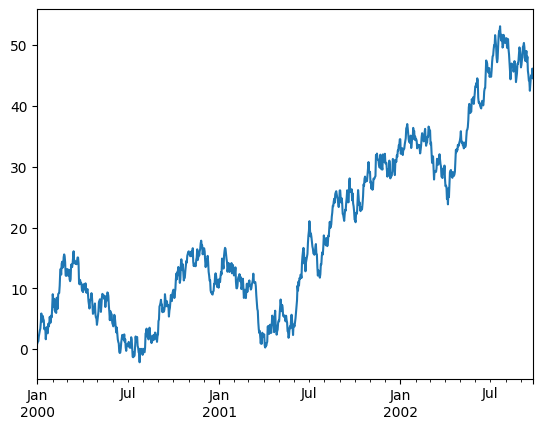

In [28]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot()

<Figure size 640x480 with 0 Axes>

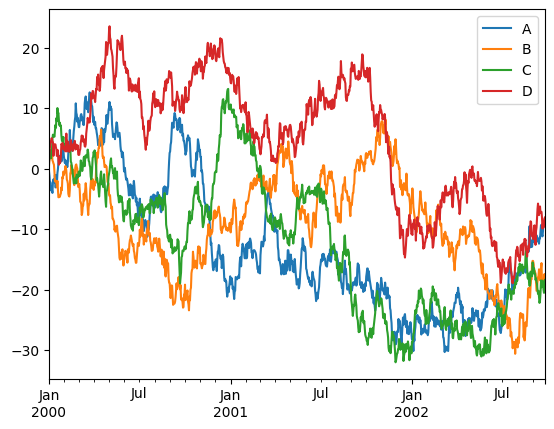

In [29]:
df5 = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)


df5 = df5.cumsum()

plt.figure()

df5.plot()

plt.legend(loc='best')

In [32]:
din = pd.date_range("20240225", periods=10) # it automatically calculates leap years also
din

DatetimeIndex(['2024-02-25', '2024-02-26', '2024-02-27', '2024-02-28',
               '2024-02-29', '2024-03-01', '2024-03-02', '2024-03-03',
               '2024-03-04', '2024-03-05'],
              dtype='datetime64[ns]', freq='D')

In [33]:
df

,A,B,C,D
2013-01-01,0.732843,-1.080405,-0.202825,1.175246
2013-01-02,1.905190,0.543353,-0.111374,0.323348
2013-01-03,0.237206,-1.562862,1.088439,-0.982023
2013-01-04,1.333752,0.756997,0.383574,1.811350
2013-01-05,0.537222,-0.266467,1.553910,0.659744
2013-01-06,0.615826,1.095335,-0.634447,-0.197770


In [37]:
df[0:5]

,A,B,C,D
2013-01-01,0.732843,-1.080405,-0.202825,1.175246
2013-01-02,1.905190,0.543353,-0.111374,0.323348
2013-01-03,0.237206,-1.562862,1.088439,-0.982023
2013-01-04,1.333752,0.756997,0.383574,1.811350
2013-01-05,0.537222,-0.266467,1.553910,0.659744


In [43]:
df.loc[:,['A','B']] # loc is used when we are playing with column names

,A,B
2013-01-01,0.732843,-1.080405
2013-01-02,1.905190,0.543353
2013-01-03,0.237206,-1.562862
2013-01-04,1.333752,0.756997
2013-01-05,0.537222,-0.266467
2013-01-06,0.615826,1.095335


In [47]:
df.iloc[2]

A    0.237206
B   -1.562862
C    1.088439
D   -0.982023
Name: 2013-01-03 00:00:00, dtype: float64

In [46]:
df.iloc[2:5,1:4] # iloc is used when we are playing with indexes

,B,C,D
2013-01-03,-1.562862,1.088439,-0.982023
2013-01-04,0.756997,0.383574,1.811350
2013-01-05,-0.266467,1.553910,0.659744


In [49]:
import seaborn as sns
ship = sns.load_dataset('titanic')

In [50]:
ship.sample(100)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
466,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
522,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
783,0,3,male,NaN,1,2,23.4500,S,Third,man,True,NaN,Southampton,no,False
819,0,3,male,10.0,3,2,27.9000,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,0,3,male,21.0,0,0,16.1000,S,Third,man,True,NaN,Southampton,no,True
490,0,3,male,NaN,1,0,19.9667,S,Third,man,True,NaN,Southampton,no,False
137,0,1,male,37.0,1,0,53.1000,S,First,man,True,C,Southampton,no,False
591,1,1,female,52.0,1,0,78.2667,C,First,woman,False,D,Cherbourg,yes,False


In [64]:
ship[ship['fare'] == 0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
263,0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True
277,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
413,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
466,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
481,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
597,0,3,male,49.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0,S,First,man,True,NaN,Southampton,no,True
